In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
file_path = "cleaned_data/ED_visits.csv"
df=pd.read_csv(file_path)
col_drop = ["Time Measure","Notes","County Code Number","Quarter Date Start","County Code Text","State FIPS Code","County FIPS Code","Latitude/Longitude"]
df=df.drop(col_drop,axis=1)
df=df[df["County Name"]=="Pennsylvania"]

# array(['Rate of ED Visits per 10,000 Visits (by facility location)',
#        'Rate of ED Visits per 10,000 Population (by patient location)'],
#       dtype=object)

1         Any Drug Overdose
6           Heroin Overdose
126     Any Opioid Overdose
264     Any Opioid Overdose
272       Any Drug Overdose
               ...         
4658      Any Drug Overdose
4707        Heroin Overdose
4798        Heroin Overdose
4870    Any Opioid Overdose
4873    Any Opioid Overdose
Name: Overdose Type, Length: 72, dtype: object

In [30]:
df2=df[df["Type of Rate"]=="Rate of ED Visits per 10,000 Population (by patient location)"]
del df2["County Name"]
del df2["Year"]
del df2["Type of Rate"]
df2

,Quarterly Rate,Overdose Type,Time Period
264,1.903864,Any Opioid Overdose,2017 Q4
341,2.251370,Any Opioid Overdose,2017 Q3
379,8.735284,Any Drug Overdose,2019 Q2
464,8.712637,Any Drug Overdose,2017 Q1
473,1.867942,Any Opioid Overdose,2017 Q1
518,2.144385,Any Opioid Overdose,2019 Q2
595,8.390902,Any Drug Overdose,2017 Q4
600,2.284168,Any Opioid Overdose,2018 Q3
745,1.764081,Any Opioid Overdose,2019 Q1
957,9.945698,Any Drug Overdose,2017 Q3


In [72]:
opod = df2[df2["Overdose Type"]=="Any Opioid Overdose"]
opod=opod.rename(columns={"Quarterly Rate":"Quarterly Rate (Any Opioid Overdose)"})

anyod=df2[df2["Overdose Type"]=="Any Drug Overdose"]
anyod=anyod.rename(columns={"Quarterly Rate":"Quarterly Rate (Any Drug Overdose)"})

hod=df2[df2["Overdose Type"]=="Heroin Overdose"]
hod=hod.rename(columns={"Quarterly Rate":"Quarterly Rate (Heroin Overdose)"})

# opod
#anyod
# hod

m1=pd.merge(opod,anyod,on="Time Period")
m2=pd.merge(m1,hod,on="Time Period")

final=m2[["Time Period","Quarterly Rate (Any Opioid Overdose)","Quarterly Rate (Any Drug Overdose)","Quarterly Rate (Heroin Overdose)"]]

final=final.sort_values("Time Period")

# final["Quarterly Rate (Any Opioid Overdose)"]=final["Quarterly Rate (Any Opioid Overdose)"].map("{:.2f}".format)
# final["Quarterly Rate (Any Drug Overdose)"]=final["Quarterly Rate (Any Drug Overdose)"].map("{:.2f}".format)
# final["Quarterly Rate (Heroin Overdose)"]=final["Quarterly Rate (Heroin Overdose)"].map("{:.2f}".format)

final

file_path2 = "cleaned_data/state_ed_visits_overtime.csv"
final.to_csv(file_path2)

final

,Time Period,Quarterly Rate (Any Opioid Overdose),Quarterly Rate (Any Drug Overdose),Quarterly Rate (Heroin Overdose)
10,2016 Q3,1.246336,8.366693,0.998006
6,2016 Q4,1.550111,8.628299,1.201043
2,2017 Q1,1.867942,8.712637,1.415013
11,2017 Q2,2.329461,9.903528,1.791413
1,2017 Q3,2.251370,9.945698,1.699265
0,2017 Q4,1.903864,8.390902,1.358006
7,2018 Q1,1.496228,7.485043,1.067507
9,2018 Q2,1.935881,8.665002,1.397052
4,2018 Q3,2.284168,9.976934,1.668028
8,2018 Q4,1.950719,8.445565,1.329893


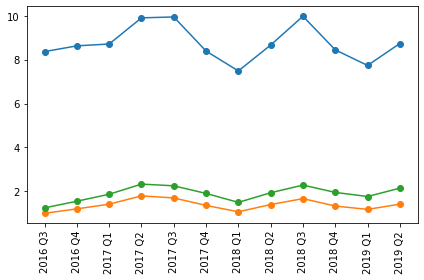

In [94]:
plt.plot(final["Time Period"],final["Quarterly Rate (Any Drug Overdose)"],marker="o")
plt.plot(final["Time Period"],final["Quarterly Rate (Heroin Overdose)"],marker="o")
plt.plot(final["Time Period"],final["Quarterly Rate (Any Opioid Overdose)"],marker="o")
plt.xticks(rotation="vertical")
plt.tight_layout()